In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/sample_data/googleplaystore.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.isna().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df['Reviews'].dtype
# dtype is O means object but we can see only numbers in unique values of that column
# if the whole column has all numbers and one single value contains an alphabet, or string value then whole column become O dtype
# we have to findout that blacksheep among these numeric values


dtype('O')

In [ ]:
# getting no.of records in which havinig numeric dtype in reviews column
df['Reviews'].str.isnumeric().sum()

10840

In [ ]:
# we have 10841 rows, among them we have numeric type rows in reviews column are 10840
# means there is only one object type in this column
df[~df['Reviews'].str.isnumeric()]# ~ is used to get not numeric

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# we can delete this or else convert this into numeric value 3000000
#since many records are there lets remove that row

In [ ]:
# lets create a copy of that df
df_copy = df.copy()

In [ ]:
df_copy = df_copy.drop(df.index[10472])

In [ ]:
df_copy['Reviews'] = df_copy['Reviews'].astype('int')# review mean no.of people given reviews so we put int or else we put float

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [ ]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
def inmb(x):
  if 'M' in x:
    x = x.replace('M','')
    number = float(x)
    rounded_number = round(number, 2)
    return rounded_number
  elif 'k' in x:
    x = x.replace('k','')
    number = float(x)/1024
    rounded_number = round(number, 2)
    return rounded_number
  elif 'G' in x:
    x = x.replace('G','')
    number = float(x)*1024
    rounded_number = round(number, 2)
    return rounded_number
  else:
    return 0

inmb('288k')

0.28

In [ ]:

inmb('3.8M')

3.8

In [ ]:
inmb('2.5G')

2560.0

In [ ]:
# convert this size into float
df_copy['Size'] = df_copy['Size'].apply(inmb)

In [ ]:
df_copy['Size'].unique()

array([1.9e+01, 1.4e+01, 8.7e+00, 2.5e+01, 2.8e+00, 5.6e+00, 2.9e+01,
       3.3e+01, 3.1e+00, 2.8e+01, 1.2e+01, 2.0e+01, 2.1e+01, 3.7e+01,
       2.7e+00, 5.5e+00, 1.7e+01, 3.9e+01, 3.1e+01, 4.2e+00, 7.0e+00,
       2.3e+01, 6.0e+00, 6.1e+00, 4.6e+00, 9.2e+00, 5.2e+00, 1.1e+01,
       2.4e+01, 0.0e+00, 9.4e+00, 1.5e+01, 1.0e+01, 1.2e+00, 2.6e+01,
       8.0e+00, 7.9e+00, 5.6e+01, 5.7e+01, 3.5e+01, 5.4e+01, 2.0e-01,
       3.6e+00, 5.7e+00, 8.6e+00, 2.4e+00, 2.7e+01, 2.5e+00, 1.6e+01,
       3.4e+00, 8.9e+00, 3.9e+00, 2.9e+00, 3.8e+01, 3.2e+01, 5.4e+00,
       1.8e+01, 1.1e+00, 2.2e+00, 4.5e+00, 9.8e+00, 5.2e+01, 9.0e+00,
       6.7e+00, 3.0e+01, 2.6e+00, 7.1e+00, 3.7e+00, 2.2e+01, 7.4e+00,
       6.4e+00, 3.2e+00, 8.2e+00, 9.9e+00, 4.9e+00, 9.5e+00, 5.0e+00,
       5.9e+00, 1.3e+01, 7.3e+01, 6.8e+00, 3.5e+00, 4.0e+00, 2.3e+00,
       7.2e+00, 2.1e+00, 4.2e+01, 7.3e+00, 9.1e+00, 5.5e+01, 2.0e-02,
       6.5e+00, 1.5e+00, 7.5e+00, 5.1e+01, 4.1e+01, 4.8e+01, 8.5e+00,
       4.6e+01, 8.3e

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df_copy[df_copy['Price'] == '$1.20']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10785,"sugar, sugar",FAMILY,4.2,1405,9.5,"10,000+",Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [ ]:
# just for practice how to change a particular value in particular column and particluar row
df_copy.loc[df_copy['Price'] == '$1.20', 'Price'] = '$2.20'

In [ ]:
# lets clean the downloads and price columns

def clean_Installs(x):
  x = x.replace(',','')
  x = x.replace('+','')
  return int(x)
df_copy['Installs'] = df_copy['Installs'].apply(clean_Installs)

In [ ]:
df_copy['Installs'].dtype

dtype('int64')

In [ ]:
df_copy['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [ ]:
def clean_Price(x):
  x = x.replace('$','')
  return float(x)
df_copy['Price'] = df_copy['Price'].apply(clean_Price)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df_copy['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   2.2 ,   1.04])

In [ ]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
# lets clean this too
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Last Updated'].unique()

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-11-23 00:00:00', '2012-06-17 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2012-02-06 00:00:00', '2014-11-25 00:00:00',
 '2016-05-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1377, dtype: datetime64[ns]

In [ ]:
df_copy['Last Updated_day'] = df_copy['Last Updated'].dt.day
df_copy['Last Updated_month'] = df_copy['Last Updated'].dt.month
df_copy['Last Updated_year'] = df_copy['Last Updated'].dt.year

In [ ]:
df_copy.drop('Last Updated', axis=1, inplace=True)

In [ ]:
df_copy['Last Updated_day'].unique()

array([ 7, 15,  1,  8, 20, 26, 14,  3, 27, 31,  2,  6, 30, 12, 25, 11, 21,
       22, 19, 29, 17, 28, 10, 18, 16,  4, 24, 23,  9,  5, 13],
      dtype=int32)

In [ ]:
df_copy['Last Updated_month'].unique()

array([ 1,  8,  6,  3,  4,  9,  7, 10, 11,  5, 12,  2], dtype=int32)

In [ ]:
df_copy['Last Updated_year'].unique()

array([2018, 2017, 2014, 2016, 2015, 2013, 2012, 2011, 2010], dtype=int32)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10840 non-null  object 
 1   Category            10840 non-null  object 
 2   Rating              9366 non-null   float64
 3   Reviews             10840 non-null  int64  
 4   Size                10840 non-null  float64
 5   Installs            10840 non-null  int64  
 6   Type                10839 non-null  object 
 7   Price               10840 non-null  float64
 8   Content Rating      10840 non-null  object 
 9   Genres              10840 non-null  object 
 10  Current Ver         10832 non-null  object 
 11  Android Ver         10838 non-null  object 
 12  Last Updated_day    10840 non-null  int32  
 13  Last Updated_month  10840 non-null  int32  
 14  Last Updated_year   10840 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage:

In [ ]:
# lets save this cleaned dataset
df_copy.to_csv('cleaned_googleplaystore.csv', index=False)

In [ ]:
# till now we completed thecleaning the dataset now we have to perform the EDA
# lets start with

In [ ]:
# app column
df_copy.duplicated('App').sum() # only app name

1181

In [ ]:
df_copy.duplicated().sum()# complete rows , this is diff from above

483

In [ ]:
# lets drop all duplicate app names by keeping the first apperance if they multiple
df_copy.drop_duplicates('App', inplace = True)

In [ ]:
import numpy as np
import pandas as pd
df_c = pd.read_csv('/content/sample_data/cleaned_googleplaystore.csv')

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10840 non-null  object 
 1   Category            10840 non-null  object 
 2   Rating              9366 non-null   float64
 3   Reviews             10840 non-null  int64  
 4   Size                10840 non-null  float64
 5   Installs            10840 non-null  int64  
 6   Type                10839 non-null  object 
 7   Price               10840 non-null  float64
 8   Content Rating      10840 non-null  object 
 9   Genres              10840 non-null  object 
 10  Current Ver         10832 non-null  object 
 11  Android Ver         10838 non-null  object 
 12  Last Updated_day    10840 non-null  int64  
 13  Last Updated_month  10840 non-null  int64  
 14  Last Updated_year   10840 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.2+

In [ ]:
# separating numerical and object columns
# Get column names for numerical columns
numerical_column_names = df_c.select_dtypes(include=['number']).columns.tolist()

# Get column names for object (categorical) columns
object_column_names = df_c.select_dtypes(include=['object']).columns.tolist()

print("Numerical Column Names:")
print(numerical_column_names)

print("\nObject Column Names:")
print(object_column_names)


Numerical Column Names:
['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated_day', 'Last Updated_month', 'Last Updated_year']

Object Column Names:
['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


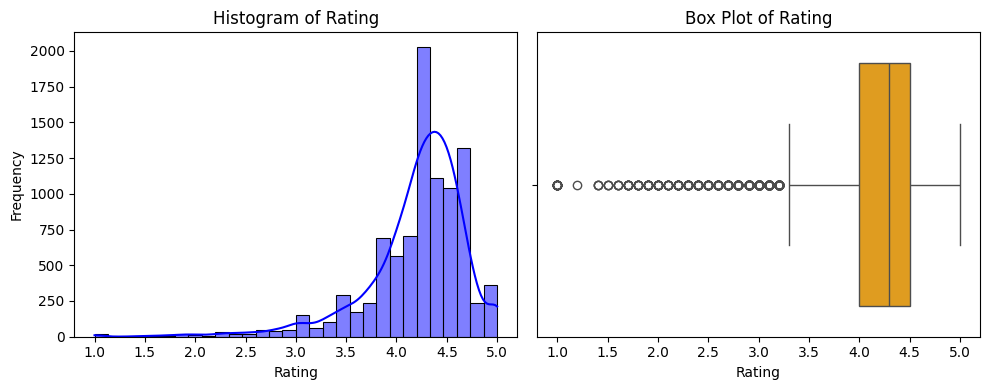

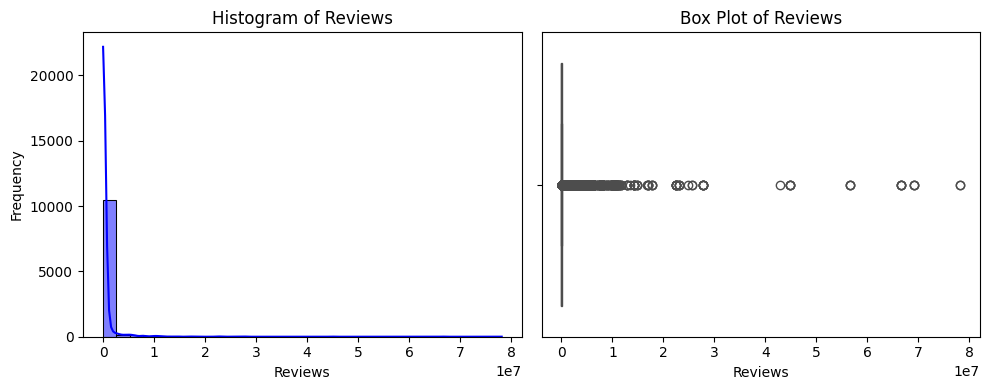

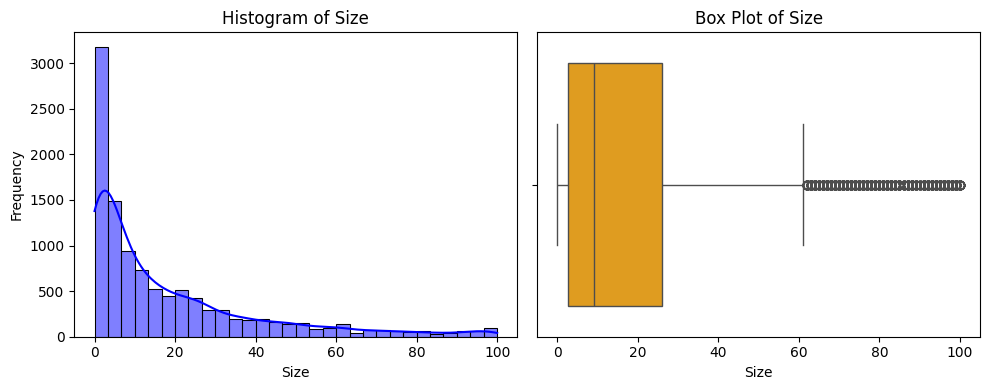

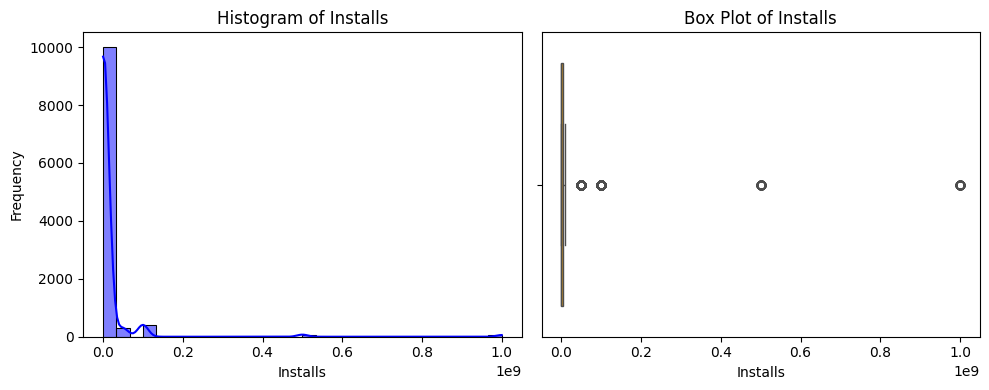

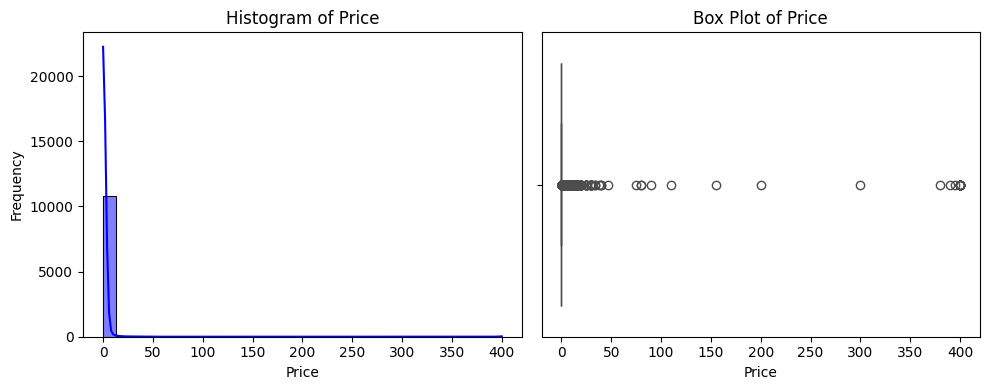

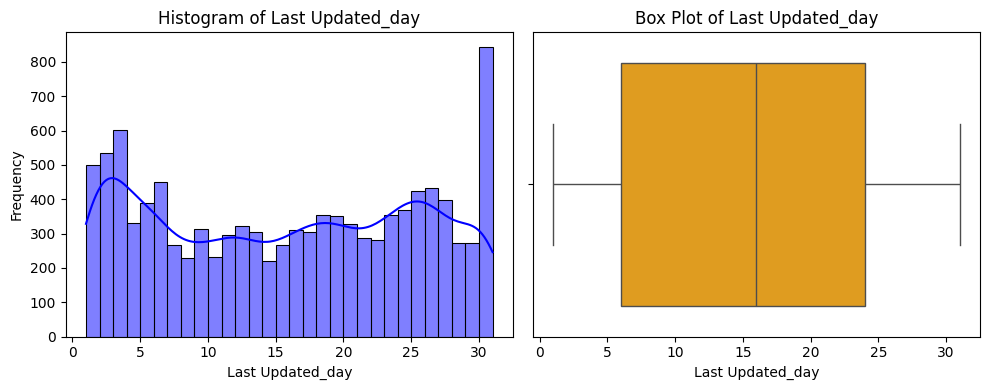

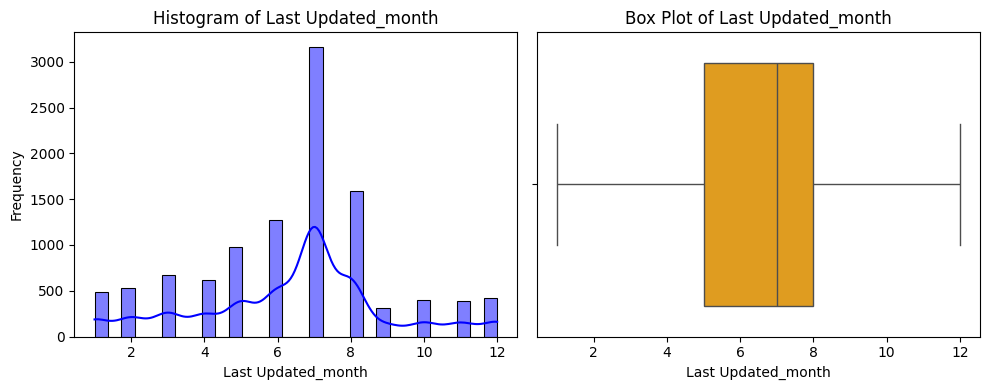

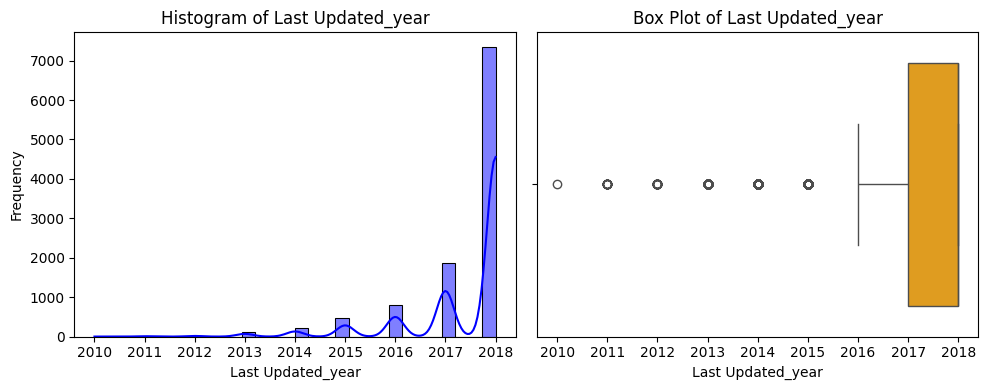

In [ ]:
# univaraint analysis
import matplotlib.pyplot as plt
import seaborn as sns


# Visualizations for univariate analysis
for col in numerical_column_names:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_c[col], bins=30, kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_c[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


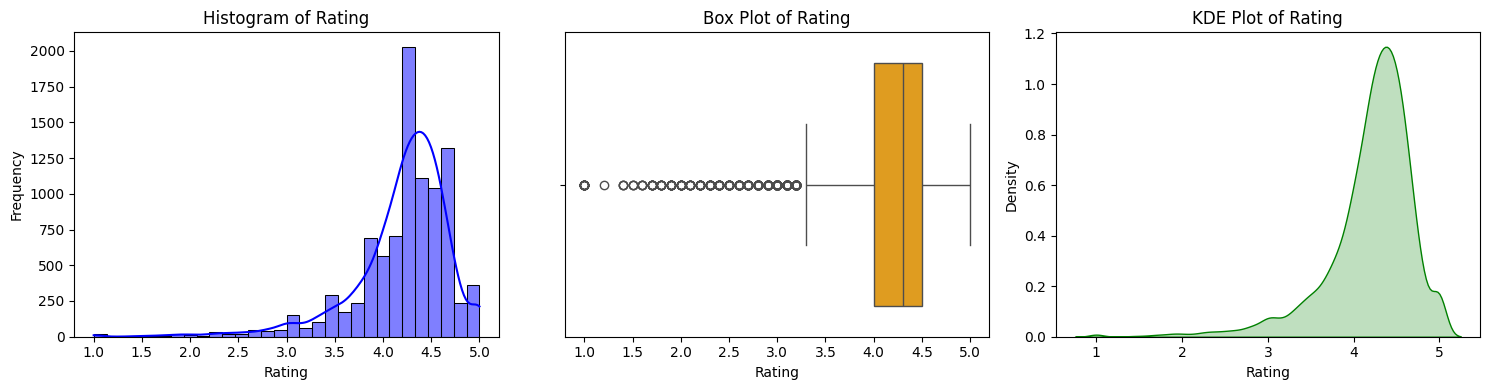

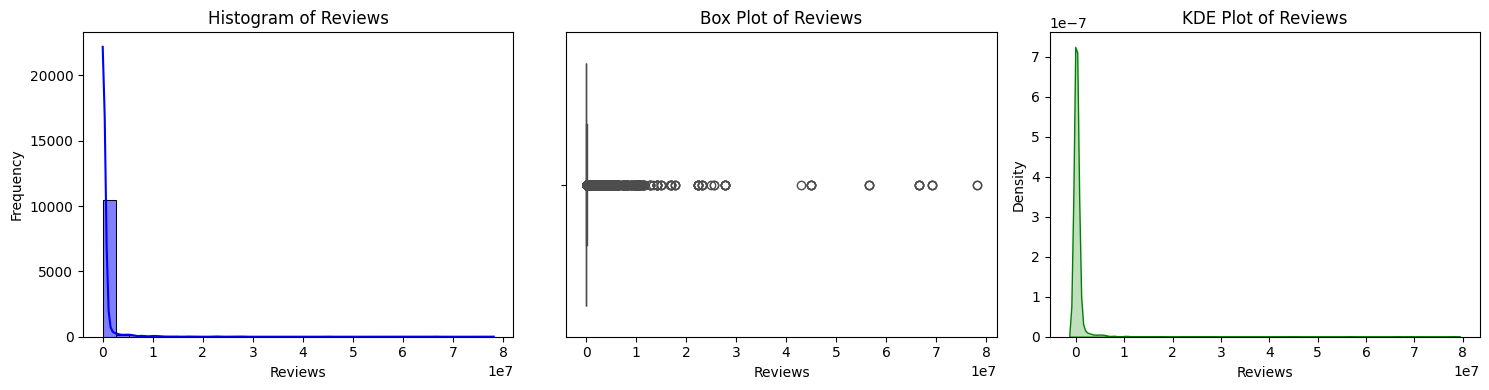

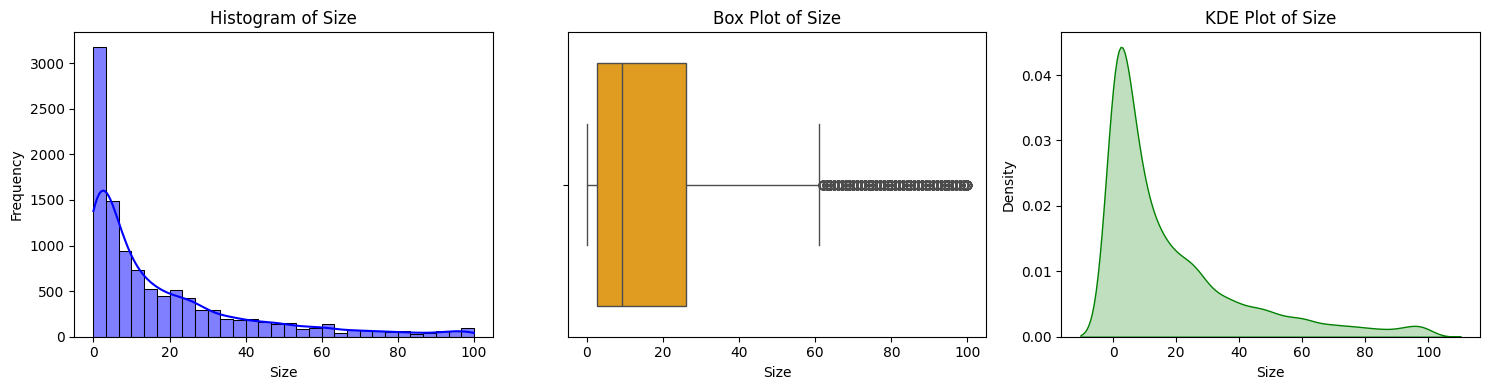

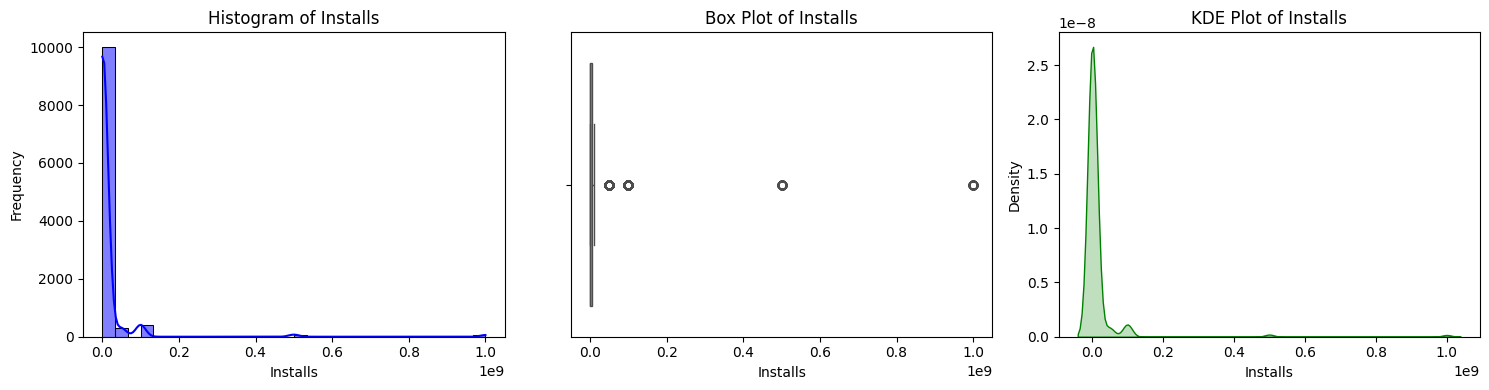

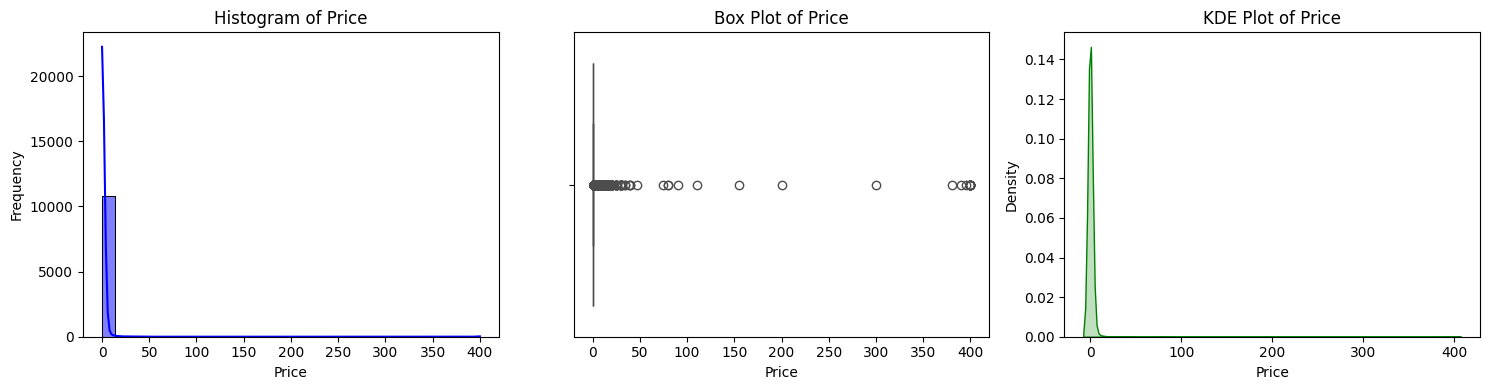

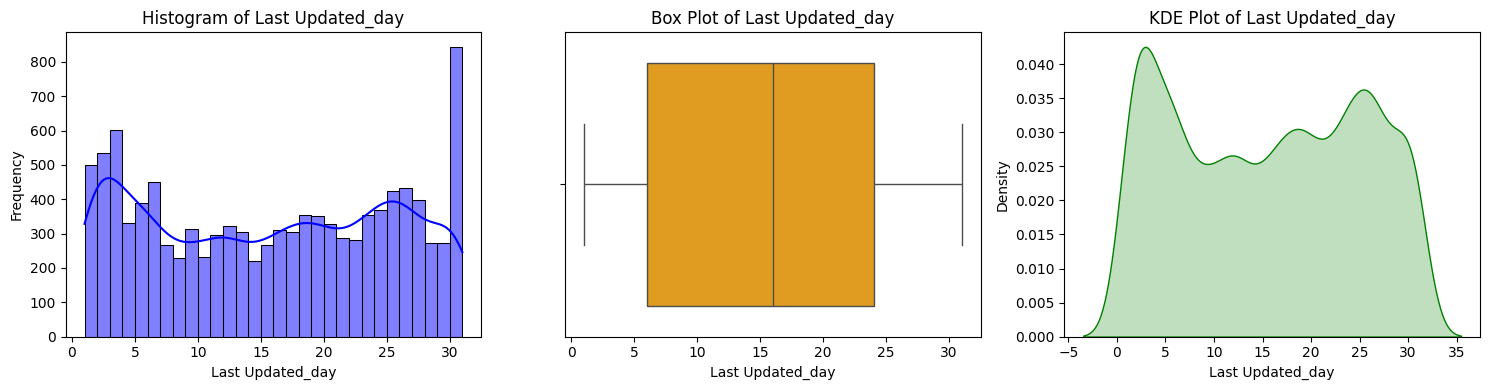

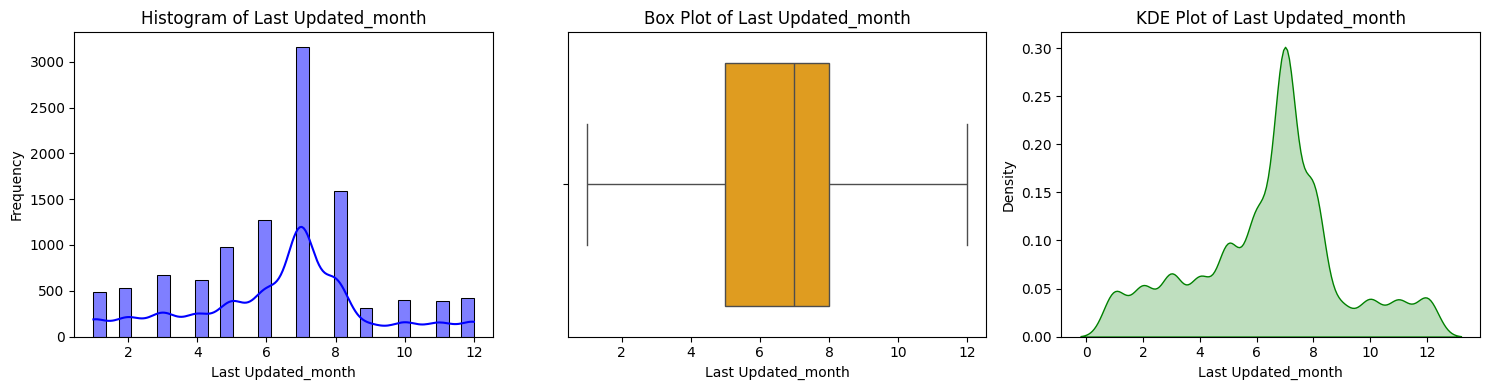

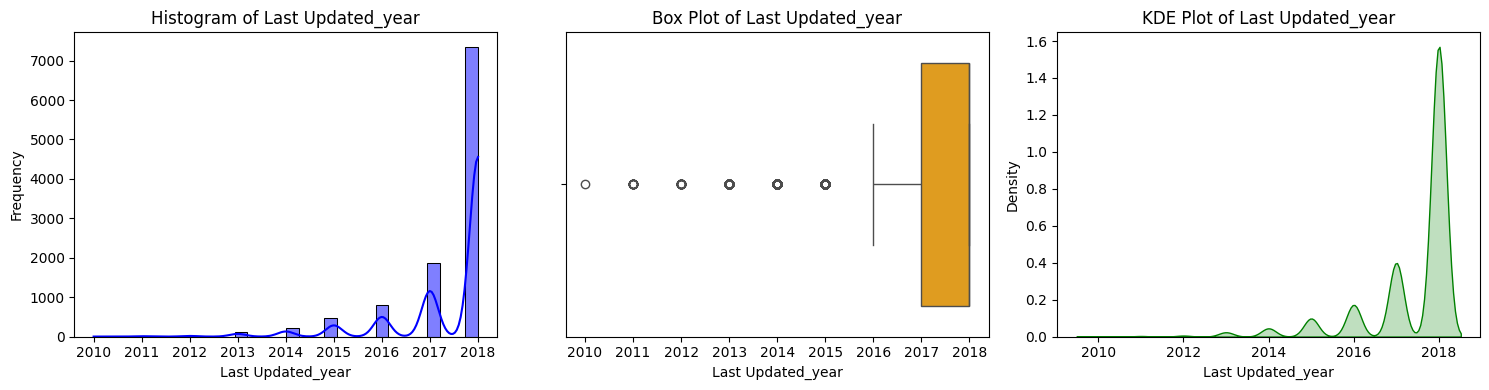

In [ ]:
#adding kde plot also

# Visualizations for univariate analysis
for col in numerical_column_names:
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_c[col], bins=30, kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_c[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df_c[col], color='green', fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

In [ ]:
#observations

# 1. Rating

# Distribution: left-skewed with a peak between 4.0 and 5.0.
# Observation:
# Most app ratings are high (around 4 to 5).
# Few apps have ratings lower than 3, indicating that most apps have favorable reviews from users.


# 2. Reviews

# Distribution: Highly right-skewed with a peak near 0.
# Observation:
# Most apps have a low number of reviews.
# A few apps have a significantly higher number of reviews (up to 70 million), which skews the distribution.


# 3. Size

# Distribution: Right-skewed with a peak between 0 and 20 MB.
# Observation:
# Most apps have a small size, likely between 0 and 20 MB.
# Some apps have sizes larger than 100 MB, but these are less common.


# 4. Installs

# Distribution: Highly right-skewed with a peak near 0.
# Observation:
# Most apps have a low number of installs.
# A few apps have a very high number of installs (up to 1 billion), which causes a long tail in the distribution.


# 5. Price

# Distribution: Heavily right-skewed with a significant peak at 0.
# Observation:
# The majority of apps are free (price = 0).
# A small number of apps have higher prices (ranging up to $400), indicating that premium apps are rare.


# 6. Last Updated Day

# Distribution: Almost uniform with minor peaks.
# Observation:
# on the day we can see distrubution on 31 above also may be there are some values in day column that are more than 31
# so those are outliers we can make them nan with this command - df_copy.loc[df_copy['Last Updated_day'] > 31, 'Last Updated_day'] = np.nan
# later we can fill them with appropriate values
# Updates are distributed fairly evenly across the days of the month.
# # No specific concentration of updates on particular days, suggesting continuous updates throughout the month.

# 7. Last Updated Month

# Peak: The plot shows a clear peak around the month of 8 (August).
# This suggests that a significant number of app updates occurred in August.
# Distribution: Right-skewed, indicating that there are more recent updates concentrated around certain months compared to older ones.
# Seasonality:
# There appears to be some seasonality with potential peaks or valleys in specific months,
# indicating certain periods when apps are more likely to be updated.


# 8. Last Updated Year

# Peak: The plot shows a sharp peak around the year 2018.
# This indicates that a large number of app updates were released in 2018.
# Trend:
# There is a general trend of increasing updates from 2010 to 2018, suggesting that the frequency of app updates rose over time.
# After 2018, there is a noticeable decline, possibly due to stabilization or a decrease in app updates.
# Outliers:
# A few outliers, especially in the earlier years, suggest that some apps were updated less frequently or not at all during those periods.

In [ ]:
# Object Column Names:
# ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']

for column in object_column_names:
    unique_values = df_c[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print('------------------------------------------------------------------')
    print()

Unique values in column 'App':
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
------------------------------------------------------------------

Unique values in column 'Category':
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
------------------------------------------------------------------

Unique values in column 'Type':
['Free' 'Paid' nan]
-----------------------------------------

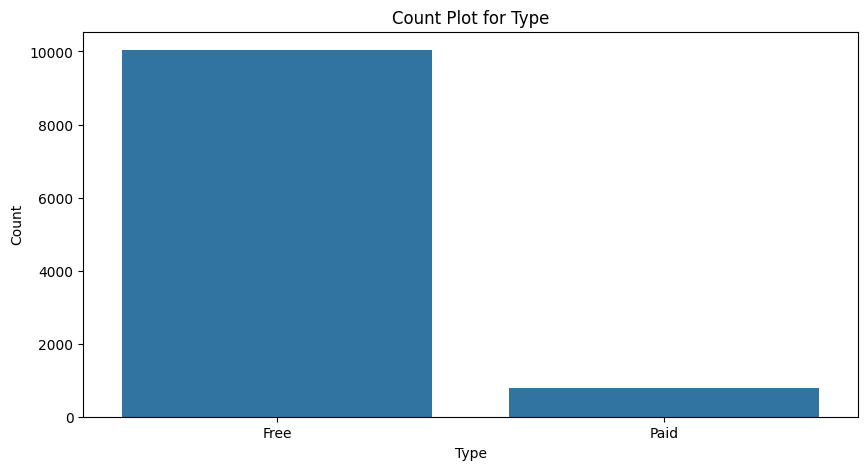

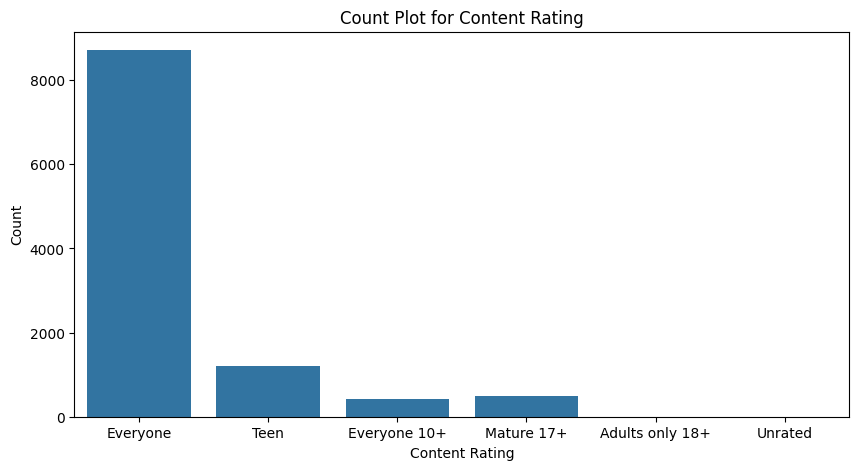

In [ ]:
# we have to  use count plot for categorical, which are having less number of categoriea and its not suitable for columns having many unique values

# countplot for type and content rating
# if more categorical columns with less categories, then use for loop for ease, im writing two time cuz here 2 onnly next time use for loop


# Create a count plot for column 'type'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_c, x='Type')
plt.title('Count Plot for Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Create a count plot for column 'content rating'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_c, x='Content Rating')
plt.title('Count Plot for Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
#observation

# type:
 #  most of the apps are free, few  are paid
# conetnt rating:
 # Everyone>>>>Teen>Everyone ≈ Mature
  # 18+ and unrated are almost 0

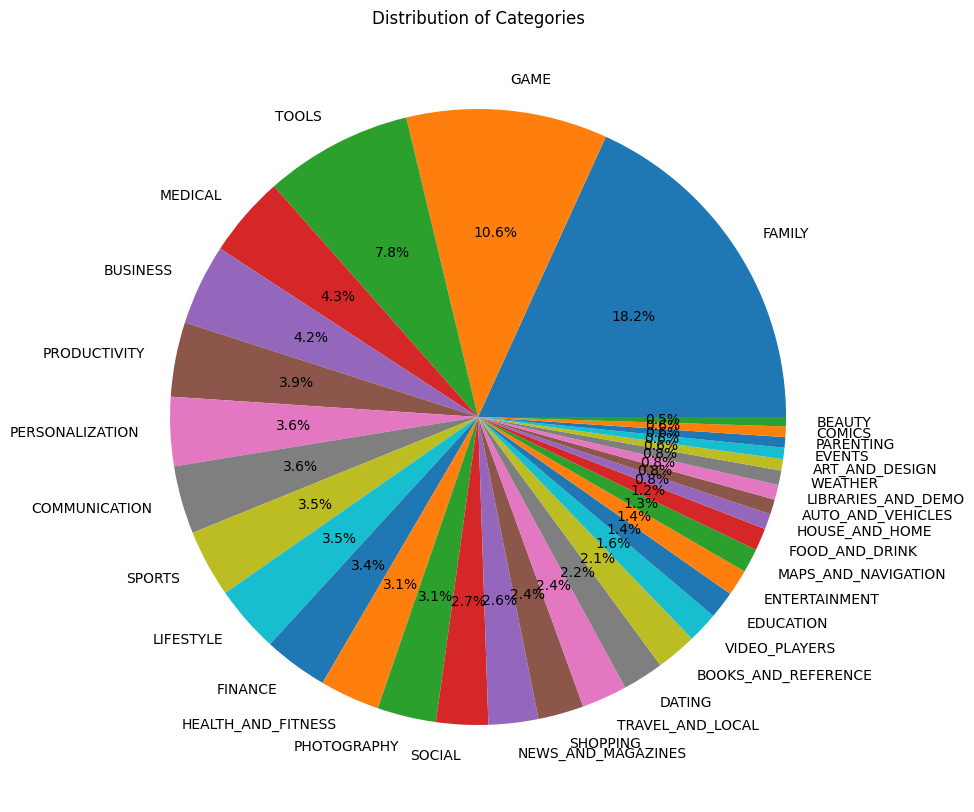

In [ ]:

# for other columns,
# lets look at category column

# Count occurrences of each unique value in the 'Category' column
counts = df_c['Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=counts.index,autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

In [ ]:
# observations - u can observe pie chat

In [ ]:
df_c['Category'].value_counts()


,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [ ]:
# to get top 10 from above just add nlargest method
top_10_categories = df_c['Category'].value_counts().nlargest(10)
top_10_categories

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


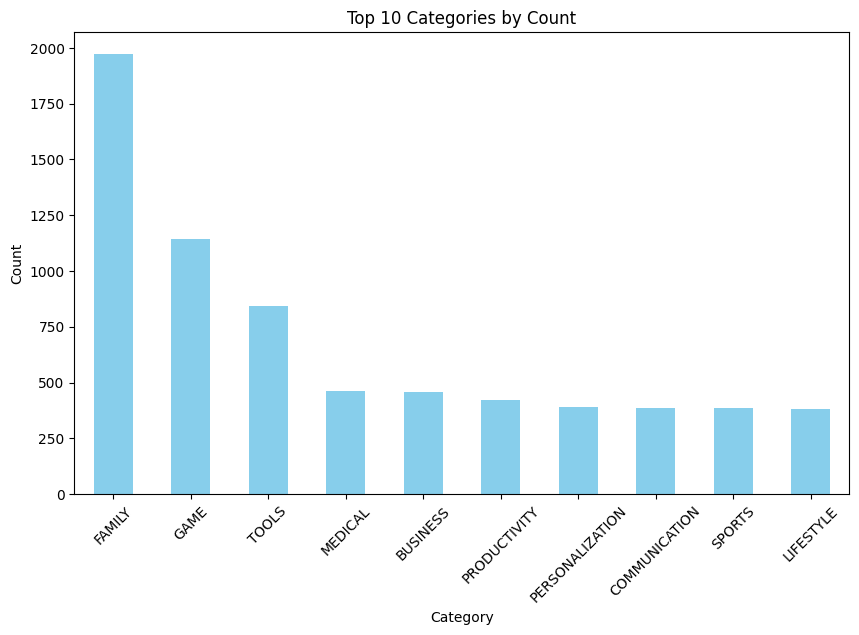

In [ ]:
# bar plot for above
top_10_categories.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#observation just see graph and make insights


In [ ]:
# some tasks
# Q - which Category has largets number of installations

df_c.groupby('Category')['Installs'].sum()

,Installs
Category,
ART_AND_DESIGN,124338100
AUTO_AND_VEHICLES,53130211
BEAUTY,27197050
BOOKS_AND_REFERENCE,1921469576
BUSINESS,1001914865
COMICS,56086150
COMMUNICATION,32647276251
DATING,264310807
EDUCATION,871452000


In [ ]:
# sorting above

df_c.groupby('Category')['Installs'].sum().sort_values(ascending=False)

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915
FAMILY,10258263505
PHOTOGRAPHY,10088247655
NEWS_AND_MAGAZINES,7496317760
TRAVEL_AND_LOCAL,6868887146


In [ ]:
# ans - game


In [ ]:
# top 5 installed apps in each popular categories
df_c.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)


,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915


In [ ]:
# in game category
# Filter for the 'Game' category
game_apps = df_c[df_c['Category'] == 'GAME']

# Sort by 'installs' in descending order and select the top 5 rows
top5_game_apps = game_apps.sort_values(by='Installs', ascending=False).head(20) # i written 20 not 5 (even thoug i wanted top 5 bcoz in top there is only game with different updataes so i tries top 20 to get different games)

print(top5_game_apps)


                   App Category  Rating   Reviews  Size    Installs  Type  \
1750    Subway Surfers     GAME     4.5  27724094  76.0  1000000000  Free   
1654    Subway Surfers     GAME     4.5  27722264  76.0  1000000000  Free   
1700    Subway Surfers     GAME     4.5  27723193  76.0  1000000000  Free   
1917    Subway Surfers     GAME     4.5  27725352  76.0  1000000000  Free   
3896    Subway Surfers     GAME     4.5  27711703  76.0  1000000000  Free   
1872    Subway Surfers     GAME     4.5  27725352  76.0  1000000000  Free   
1886      Temple Run 2     GAME     4.3   8119151  62.0   500000000  Free   
1705  Candy Crush Saga     GAME     4.4  22428456  74.0   500000000  Free   
1920      Temple Run 2     GAME     4.3   8119154  62.0   500000000  Free   
1702               Pou     GAME     4.3  10485334  24.0   500000000  Free   
1722    My Talking Tom     GAME     4.5  14891223   0.0   500000000  Free   
1908    My Talking Tom     GAME     4.5  14892469   0.0   500000000  Free   

In [ ]:
# # Select only the 'app_name' column
top5_app_names = top5_game_apps[['App']]
top5_app_names

,App
1750,Subway Surfers
1654,Subway Surfers
1700,Subway Surfers
1917,Subway Surfers
3896,Subway Surfers
1872,Subway Surfers
1886,Temple Run 2
1705,Candy Crush Saga
1920,Temple Run 2
1702,Pou


In [ ]:
# GAME	35086024415
# COMMUNICATION	32647276251
# PRODUCTIVITY	14176091369
# SOCIAL	14069867902
# TOOLS	11452771915

communication_apps = df_c[df_c['Category'] == 'COMMUNICATION']
communication_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated_day,Last Updated_month,Last Updated_year
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device,1,8,2018
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device,3,8,2018
337,Messenger for SMS,COMMUNICATION,4.3,125257,17.0,10000000,Free,0.0,Teen,Communication,1.8.9,4.1 and up,6,6,2018
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device,1,8,2018
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,0.0,100000000,Free,0.0,Everyone,Communication,37.0.0.7.163,2.3 and up,25,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0 and up,6,7,2018
10733,FP Connect,COMMUNICATION,NaN,0,22.0,100,Free,0.0,Teen,Communication,3.15.1,4.1 and up,15,12,2017
10738,FreedomPop Messaging Phone/SIM,COMMUNICATION,3.6,9894,39.0,500000,Free,0.0,Everyone,Communication,23.01.1265.0712,4.1 and up,26,7,2018
10747,FP Live,COMMUNICATION,NaN,0,3.3,10,Free,0.0,Teen,Communication,1.2.4,4.2 and up,3,11,2017


In [ ]:
top_20_apps_in_comm = communication_apps.sort_values(by='Installs', ascending=False).head(20)

In [ ]:
top_20_apps_in_comm['App']

,App
335,Messenger – Text and Video Chat for Free
4234,Skype - free IM & video calls
391,Skype - free IM & video calls
411,Google Chrome: Fast & Secure
386,Hangouts
382,Messenger – Text and Video Chat for Free
381,WhatsApp Messenger
451,Gmail
464,Hangouts
468,Skype - free IM & video calls


In [ ]:
#  Q - how many apps which have rating 5

df_c[df_c['Rating'] == 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated_day,Last Updated_month,Last Updated_year
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000,Free,0.0,Everyone,Comics,2.0,4.0.3 and up,26,6,2018
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,3.0,4.0.3 and up,17,7,2018
615,Awake Dating,DATING,5.0,2,70.0,100,Free,0.0,Mature 17+,Dating,2.2.9,4.4 and up,24,7,2018
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,4.0,4.0.3 and up,14,7,2018
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,8.2,4.0.3 and up,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10720,Mad Dash Fo' Cash,GAME,5.0,14,16.0,100,Free,0.0,Everyone,Arcade,2.5a,4.1 and up,19,6,2017
10741,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,0.7.1,4.4 and up,31,12,2017
10775,Monster Ride Pro,GAME,5.0,1,24.0,10,Free,0.0,Everyone,Racing,2.0,2.3 and up,5,3,2018
10819,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,3.8.0,4.1 and up,27,6,2018


In [ ]:
star5apps = df_c[df_c['Rating'] == 5]

In [ ]:
star5apps['App'].unique()

array(['Hojiboy Tojiboyev Life Hacks', 'American Girls Mobile Numbers',
       'Awake Dating', 'Spine- The dating app',
       'Girls Live Talk - Free Text and Video Chat',
       'Online Girls Chat Group', 'Speeding Joyride & Car Meet App',
       'SUMMER SONIC app', 'Prosperity', 'Mindvalley U Tallinn 2018',
       'Eternal life', 'Super Hearing Secret Voices Recorder PRO',
       'FHR 5-Tier 2.0', 'Sway Medical', 'Labs on Demand',
       'Dermatology Atlas (Colored & Illustrative)', 'Tablet Reminder',
       'Galaxies of Hope', 'KBA-EZ Health Guide', 'FoothillsVet',
       'PrimeDelivery', "You're an Anime",
       'Anatomy & Physiology Vocabulary Exam Review App',
       'NCLEX Multi-topic Nursing Exam Review-Quiz & notes',
       'Basics of Orthopaedics', 'Clinic Doctor EHr',
       '420 BZ Budeze Delivery', 'BP Journal - Blood Pressure Diary',
       'Zen Leaf', 'ADS-B Driver', 'P-Home for KLWP',
       'Android P Style Icon Pack', 'R Programing Offline Tutorial',
       'Easy Ho

In [ ]:
star5apps['App'].nunique()# gives cout of unique values

271